In [33]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Data Ingestion Step
dfc = pd.read_csv('/config/workspace/Data/finalTrain (1).csv')
dfc.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
df = dfc.copy()

In [4]:
name_counts = df['Delivery_person_ID'].value_counts()
df['Delivery_person_ID'] = df['Delivery_person_ID'].map(name_counts)


In [5]:
pd.set_option('display.max_columns', None)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,12,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,13,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,39,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,15,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,13,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,60,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,13,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,44,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,62,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [6]:
df = df.drop(labels=['ID'],axis=1)

In [7]:
# Function to calculate the Haversine distance between two latitude-longitude points
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    latitude1_rad = math.radians(lat1)
    longitude1_rad = math.radians(lon1)
    latitude2_rad = math.radians(lat2)
    longitude2_rad = math.radians(lon2)

    # Calculate differences in latitude and longitude
    delta_latitude = latitude2_rad - latitude1_rad
    delta_longitude = longitude2_rad - longitude1_rad

    # Haversine formula
    a = math.sin(delta_latitude / 2) ** 2 + math.cos(latitude1_rad) * math.cos(latitude2_rad) * math.sin(delta_longitude / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Earth's radius in kilometers
    earth_radius_km = 6371.0

    # Calculate the distance
    distance_km = earth_radius_km * c

    return distance_km

# Calculate the distance for each row and store it in a new column 'Distance'
df['Distance'] = df.apply(lambda row: haversine_distance(row['Restaurant_latitude'],
                                                        row['Restaurant_longitude'],
                                                        row['Delivery_location_latitude'],
                                                        row['Delivery_location_longitude']), axis=1)

delivery_longitude_idx = df.columns.get_loc('Delivery_location_longitude')

# Get the 'Distance' column as a separate Series
distance_series = df['Distance']

# Remove the 'Distance' column from the DataFrame
df = df.drop(columns=['Distance'])

# Insert the 'Distance' column right after the 'Delivery_location_longitude' column
df.insert(delivery_longitude_idx + 1, 'Distance', distance_series)


In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')

# Split the date into separate columns
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

# Drop the original 'Order_Date' column if you no longer need it
df.drop('Order_Date', axis=1, inplace=True)

In [9]:
df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]
df.drop('Time_Orderd',axis=1,inplace=True)


In [10]:
df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]
df.drop('Time_Order_picked',axis=1,inplace=True)

In [15]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Distance,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_Year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,Time_taken
0,12,36.0,4.2,30.327968,78.046106,30.397968,78.116106,10.280582,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022,21.0,55.0,22.0,10.0,15.0
1,13,21.0,4.7,10.003064,76.307589,10.043064,76.347589,6.242319,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022,14.0,55.0,15.0,5.0,10.0
2,39,23.0,4.7,18.562450,73.916619,18.652450,74.006619,13.787860,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022,17.0,30.0,17.0,40.0,10.0
3,15,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2.930258,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022,9.0,20.0,9.0,30.0,10.0
4,13,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.396618,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022,19.0,50.0,20.0,5.0,15.0


In [14]:
df['Order_Hour'] = pd.to_numeric(df['Order_Hour'])
df['Order_Min'] = pd.to_numeric(df['Order_Min'])
df['Picked_Hour'] = pd.to_numeric(df['Picked_Hour'])
df['Picked_Min'] = pd.to_numeric(df['Picked_Min'])
def calculate_time_taken(row):
    order_time_in_minutes = row['Order_Hour'] * 60 + row['Order_Min']
    picked_time_in_minutes = row['Picked_Hour'] * 60 + row['Picked_Min']

    time_difference_in_minutes = picked_time_in_minutes - order_time_in_minutes

    return time_difference_in_minutes

# Calculate time taken for each order and add 'Time_taken' column to the DataFrame
df['Time_taken'] = df.apply(lambda row: calculate_time_taken(row), axis=1)

In [27]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Distance,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_prepare_time,Order_Day,Order_Month,Order_Year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,Time_taken
0,12,36.0,4.2,30.327968,78.046106,30.397968,78.116106,10.280582,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,15.0,12,2,2022,21.0,55.0,22.0,10.0,46
1,13,21.0,4.7,10.003064,76.307589,10.043064,76.347589,6.242319,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,10.0,13,2,2022,14.0,55.0,15.0,5.0,23
2,39,23.0,4.7,18.562450,73.916619,18.652450,74.006619,13.787860,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,10.0,4,3,2022,17.0,30.0,17.0,40.0,21
3,15,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2.930258,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,10.0,13,2,2022,9.0,20.0,9.0,30.0,20
4,13,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.396618,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,15.0,14,2,2022,19.0,50.0,20.0,5.0,41


In [23]:
df['Time_taken (min)'], df['Time_taken'] = df['Time_taken'], df['Time_taken (min)']

In [26]:
df.rename(columns={'Time_taken (min)': 'Order_prepare_time'}, inplace=True)

In [31]:
df['Type_of_order'].value_counts()

Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

In [35]:
categorical_columns = df.columns[df.dtypes=='object']

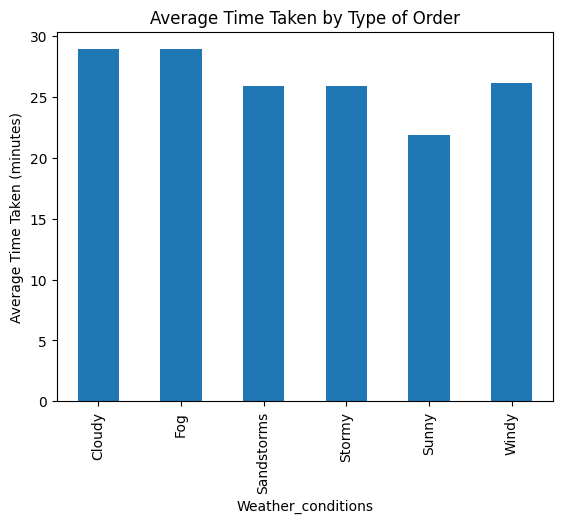

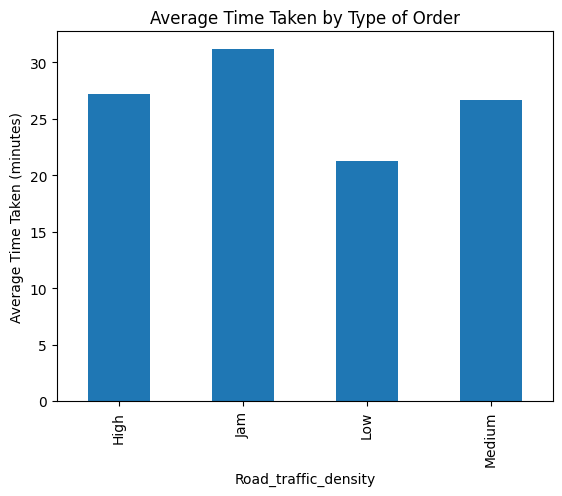

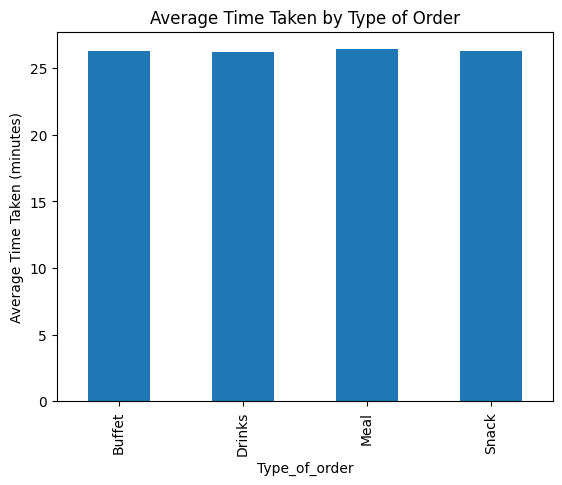

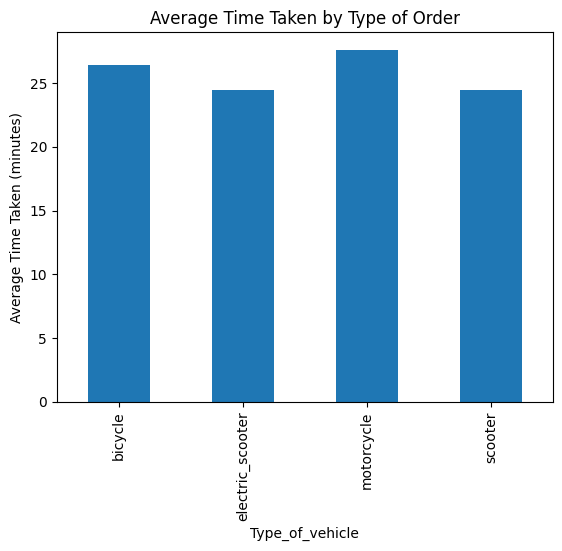

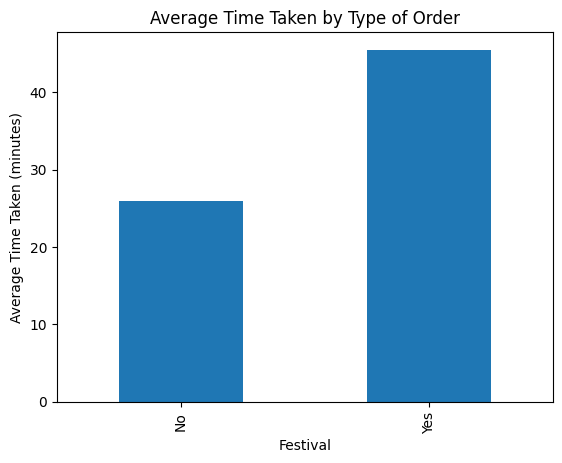

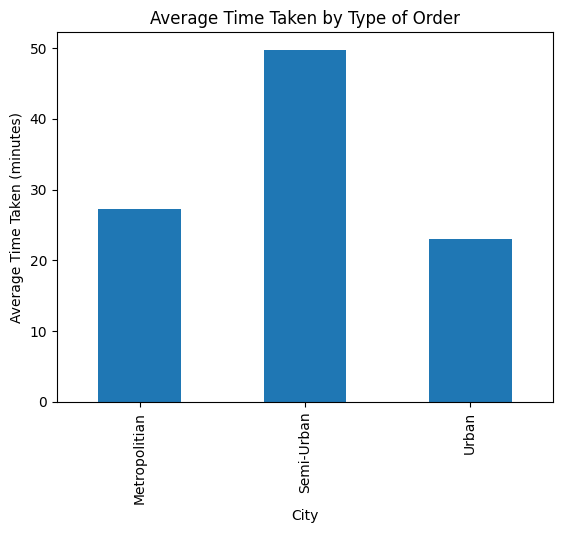

In [36]:
for i in categorical_columns:
    avg_time_by_order_type = df.groupby(i)['Time_taken'].mean()
    avg_time_by_order_type.plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('Average Time Taken (minutes)')
    plt.title('Average Time Taken by Type of Order')
    plt.show()

In [ ]:
df = df.drop(labels=['Type_of_order'],axis=1)

In [37]:
Weather_conditions_Map={"Sunny":1,"Windy":2,"Sandstorms":2,"Stormy":2,"Cloudy":3,"Fog":3}
Road_Traffic_Map={"Low":1,"Medium":2,"High":3,"Jam":4}
Type_of_vehicle_map={"scooter":1,"electric_scooter":1,"bicycle":2,"motorcycle":2}
Festival_Map={"No":1,"Yes":2}
City_Map={"Urban":1,"Metropolitian":2,"Semi-Urban":3}

In [38]:
df['Weather_conditions']=df['Weather_conditions'].replace(Weather_conditions_Map)
df['Road_traffic_density']=df['Road_traffic_density'].replace(Road_Traffic_Map)
df['Type_of_vehicle']=df['Type_of_vehicle'].map(Type_of_vehicle_map)
df['Festival']=df['Festival'].map(Festival_Map)
df['City']=df['City'].map(City_Map)

In [39]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Distance,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_prepare_time,Order_Day,Order_Month,Order_Year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,Time_taken
0,12,36.0,4.2,30.327968,78.046106,30.397968,78.116106,10.280582,3.0,4.0,2,Snack,2,3.0,1.0,2.0,15.0,12,2,2022,21.0,55.0,22.0,10.0,46
1,13,21.0,4.7,10.003064,76.307589,10.043064,76.347589,6.242319,2.0,3.0,1,Meal,2,1.0,1.0,2.0,10.0,13,2,2022,14.0,55.0,15.0,5.0,23
2,39,23.0,4.7,18.562450,73.916619,18.652450,74.006619,13.787860,2.0,2.0,1,Drinks,1,1.0,1.0,2.0,10.0,4,3,2022,17.0,30.0,17.0,40.0,21
3,15,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2.930258,2.0,1.0,0,Buffet,2,0.0,1.0,2.0,10.0,13,2,2022,9.0,20.0,9.0,30.0,20
4,13,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.396618,3.0,4.0,1,Snack,1,1.0,1.0,2.0,15.0,14,2,2022,19.0,50.0,20.0,5.0,41


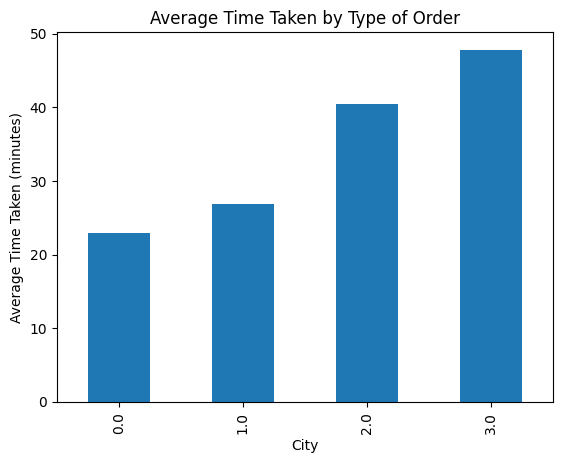

In [41]:
avg_time_by_order_type = df.groupby('multiple_deliveries')['Time_taken'].mean()
avg_time_by_order_type.plot(kind='bar')
plt.xlabel(i)
plt.ylabel('Average Time Taken (minutes)')
plt.title('Average Time Taken by Type of Order')
plt.show()

In [48]:
folder_path = '/config/workspace/Data'
file_path = os.path.join(folder_path, 'Cleaned_data.csv')
df.to_csv(file_path, index=False)